In [56]:
pip install pykegg

In [57]:
# import libraries
import pykegg
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
# export to csv file which can use excel to open
import csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0                [mmu:20437, mmu:20438]
1                           [mmu:16009]
2     [mmu:13197, mmu:17873, mmu:23882]
3                           [mmu:17248]
4                           [mmu:12649]
                    ...                
60                          [mmu:12048]
61                          [mmu:12043]
62                          [mmu:71361]
63                          [mmu:29813]
64                         [mmu:333654]
Name: name, Length: 65, dtype: object


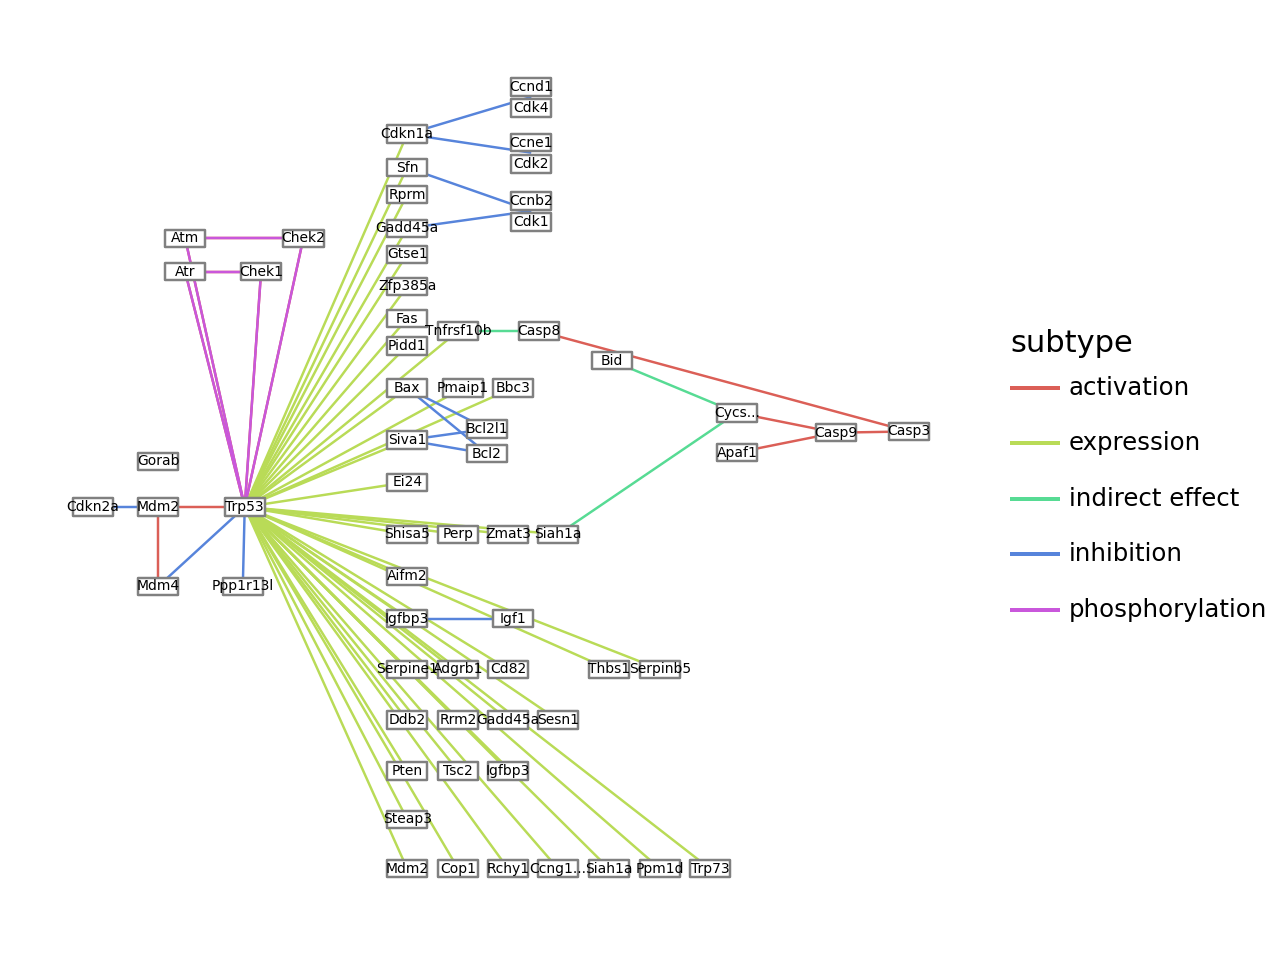

<Figure Size: (640 x 480)>

In [59]:
# Load the KEGG pathway (e.g., hsa03460)
g = pykegg.KGML_graph(pid="mmu04115")

# Export the pathway as an igraph
# igraph: interaction between genes in the pathway (vertices and edges)
gra = g.get_graph()

# get the name of the nodes (genes) in the igraph
gname=gra.vs["name"]
gname=pd.DataFrame(gname)
gname.to_csv('/content/drive/My Drive/gene_adj_mmu04115.csv', index=False) # change the name of the file "mmu04115"

# Export the pathway as an adjacency matrix
adj=pd.DataFrame(gra.get_adjacency())
adj.to_csv('/content/drive/My Drive/adjacency matrix_mmu04115.csv') # change the name of the file "mmu04115"

# Overlay the pathway on a raw image
nds = g.get_nodes()
nds = nds[nds.original_type == "gene"]

# list of genes in the pathway
name=pd.DataFrame(nds.name)
name1=(name['name'].str.split())
print(name1)
delimiter = ","
names_flat = [name for sublist in name1 for name in sublist]
names_df = pd.DataFrame(names_flat, columns=["GeneName"])
names_df.to_csv('/content/drive/My Drive/gene_list_mmu04115.csv', index=False)

# Export the pathway as an image
nds["lfc"] = np.arange(-2, 2, 0.01)[0:nds.shape[0]]
cmap_grad = mpl.colors.LinearSegmentedColormap.from_list("cmap_grad", ["yellow", "green"])
norm = mpl.colors.Normalize(vmin=min(nds.lfc), vmax=max(nds.lfc))
nds["color"] = [mpl.colors.to_hex(cmap_grad(norm(x))) if x is not None else None for x in nds.lfc]
Image.fromarray(pykegg.overlay_opencv_image(nds, pid="mmu04115"))  # change the name of the file "mmu04115"

# Plot the pathway using plotnine
# options.figure_size = (7, 5)
pykegg.plot_kegg_pathway_plotnine(g, node_x_nudge=25, label_size=5, show_label="gene")
